In [5]:
import zipfile
import os

# Step 1: Ensure the zip file is uploaded
zip_path = '/content/cataract Final Data.zip'

# Step 2: Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()

# Step 3: Verify the contents
base_dir = 'cataract Final Data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Train and test subfolders
train_cataract_dir = os.path.join(train_dir, 'cataract')
train_normal_dir = os.path.join(train_dir, 'Normal')
test_cataract_dir = os.path.join(test_dir, 'cataract')
test_normal_dir = os.path.join(test_dir, 'Normal')

# Check the contents
print("Training Cataract images:", len(os.listdir(train_cataract_dir)))
print("Training Normal images:", len(os.listdir(train_normal_dir)))
print("Testing Cataract images:", len(os.listdir(test_cataract_dir)))
print("Testing Normal images:", len(os.listdir(test_normal_dir)))


Training Cataract images: 158
Training Normal images: 172
Testing Cataract images: 38
Testing Normal images: 42


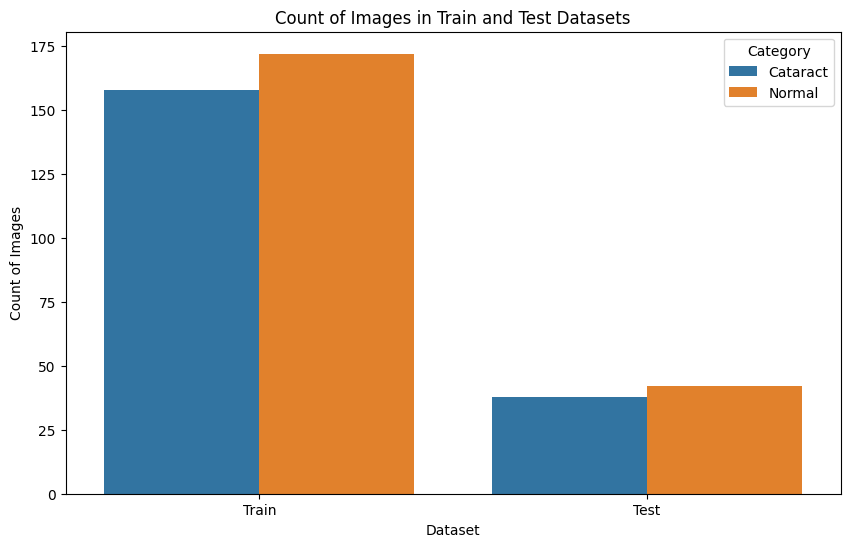

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Count the number of images in each category
train_cataract_count = len(os.listdir(train_cataract_dir))
train_normal_count = len(os.listdir(train_normal_dir))
test_cataract_count = len(os.listdir(test_cataract_dir))
test_normal_count = len(os.listdir(test_normal_dir))

# Create data for the count plot
data = {
    'Dataset': ['Train', 'Train', 'Test', 'Test'],
    'Category': ['Cataract', 'Normal', 'Cataract', 'Normal'],
    'Count': [train_cataract_count, train_normal_count, test_cataract_count, test_normal_count]
}

# Create a DataFrame
import pandas as pd
df = pd.DataFrame(data)

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Dataset', y='Count', hue='Category', data=df)
plt.title('Count of Images in Train and Test Datasets')
plt.xlabel('Dataset')
plt.ylabel('Count of Images')
plt.show()


Found 330 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


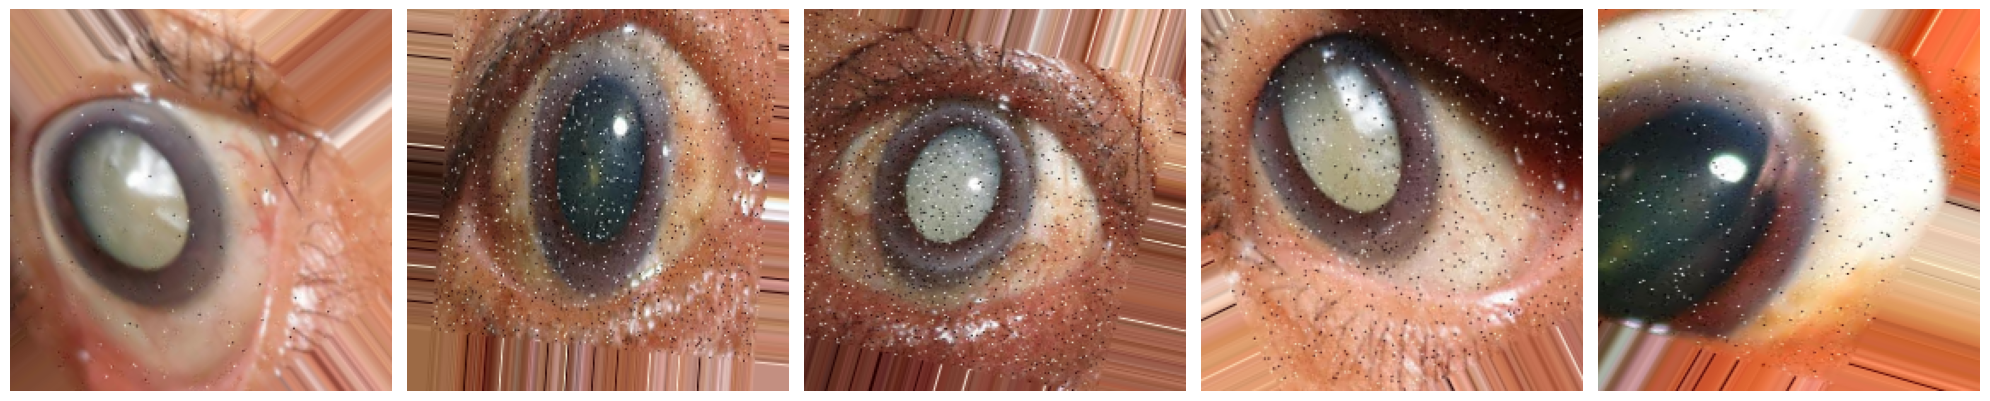

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
IMG_SIZE = (224, 224)  # Resize to 224x224
BATCH_SIZE = 32

# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Create training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Create testing data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# Display a few augmented images
import matplotlib.pyplot as plt

def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Get a batch of images from the training generator
images, labels = next(train_generator)

# Plot the images
plot_images(images)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
# Define constants
IMG_SIZE = (224, 224)  # Resize to 224x224
BATCH_SIZE = 32
EPOCHS = 20

# **CNN Model**

In [13]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=EPOCHS, validation_data=test_generator)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/20
11/11 [==============================] - 7s 447ms/step - loss: 0.7748 - accuracy: 0.5152 - val_loss: 0.6747 - val_accuracy: 0.7250
Epoch 2/20
11/11 [==============================] - 4s 415ms/step - loss: 0.6760 - accuracy: 0.5879 - val_loss: 0.6134 - val_accuracy: 0.7125
Epoch 3/20
11/11 [==============================] - 4s 383ms/step - loss: 0.6107 - accuracy: 0.6636 - val_loss: 0.5431 - val_accuracy: 0.7250
Epoch 4/20
11/11 [==============================] - 5s 516ms/step - loss: 0.5419 - accuracy: 0.7303 - val_loss: 0.5442 - val_accuracy: 0.7500
Epoch 5/20
11/11 [==============================] - 5s 417ms/step - loss: 0.5995 - accuracy: 0.7152 - val_loss: 0.5420 - val_accuracy: 0.6625
Epoch 6/20
11/11 [==============================] - 5s 423ms/step - loss: 0.5528 - accuracy: 0.7727 - val_loss: 0.4266 - val_accuracy: 0.8875
Epoch 7/20
11/11 [==============================] - 4s 381ms/step - loss: 0.4640 - accuracy: 0.7545 - val_loss: 0.8131 - val_accuracy: 0.6250
Epoch 

Found 80 images belonging to 2 classes.
1/1 [==============================] - 0s 163ms/step


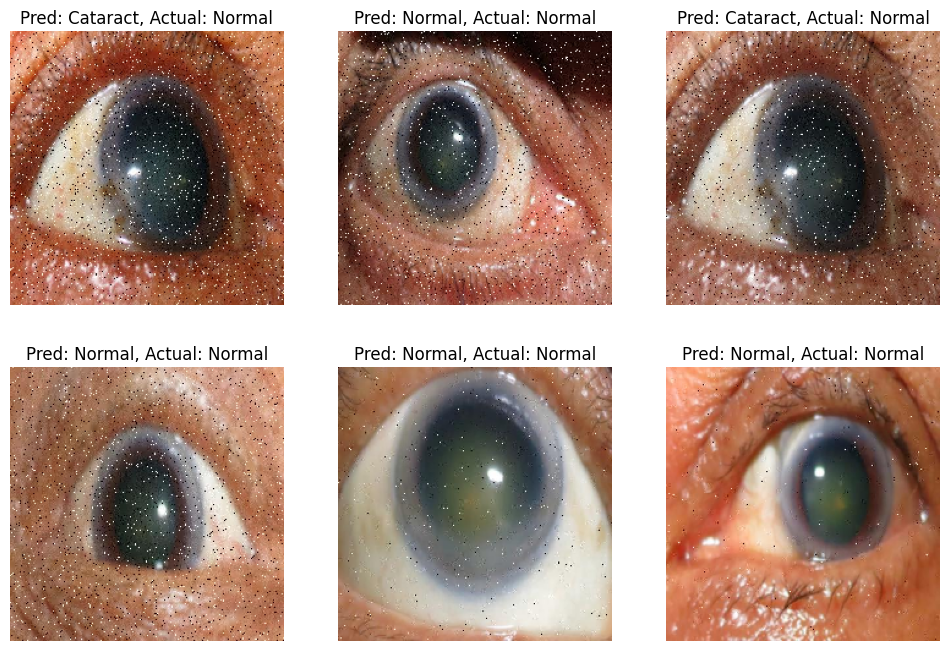

In [17]:
import random

def plot_predictions(model, validation_generator):
    # Get a batch of images and labels
    images, labels = next(validation_generator)

    # Get predictions for the images
    predictions = model.predict(images)
    predicted_classes = (predictions > 0.5).astype(int).flatten()

    # Randomly select 6 images to display
    indices = random.sample(range(len(images)), 6)

    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(indices):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[idx])
        actual_class = 'Cataract' if labels[idx] == 1 else 'Normal'
        predicted_class = 'Cataract' if predicted_classes[idx] == 1 else 'Normal'
        plt.title(f'Pred: {predicted_class}, Actual: {actual_class}')
        plt.axis('off')

    plt.show()

# Get a batch of images from the test generator to use for visualization
test_generator.reset()  # Ensure generator is at the start
images, labels = next(test_generator)

# Create a smaller generator with a batch size equal to the number of images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Smaller generator with batch size = len(images)
small_test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=len(images),
    class_mode='binary',
    shuffle=False
)

# Plot predictions on test data
plot_predictions(model, small_test_generator)

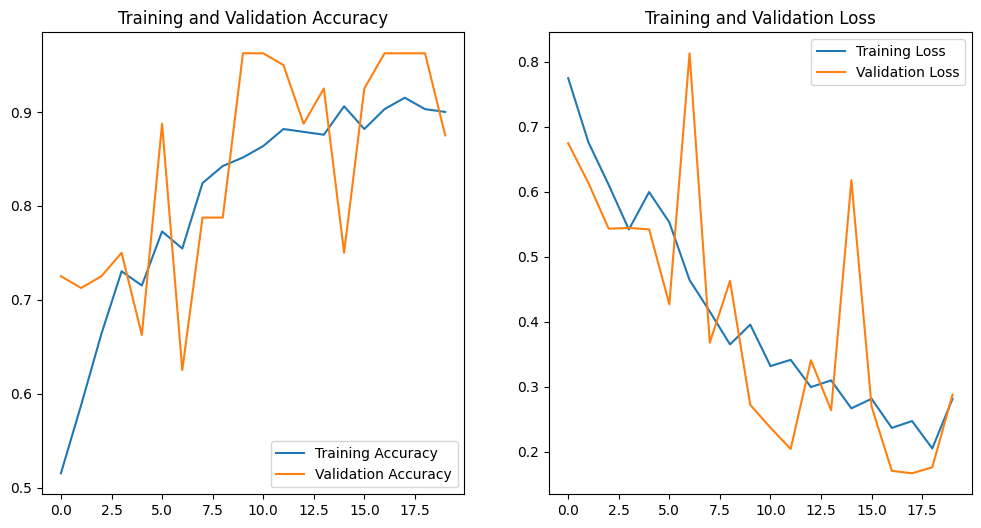

In [18]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(EPOCHS)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')

    plt.show()

# Plot the training history
plot_training_history(history)


3/3 [==============================] - 1s 169ms/step
Classification Report:
              precision    recall  f1-score   support

      Normal       0.58      0.50      0.54        42
    cataract       0.52      0.61      0.56        38

    accuracy                           0.55        80
   macro avg       0.55      0.55      0.55        80
weighted avg       0.55      0.55      0.55        80

Confusion Matrix:


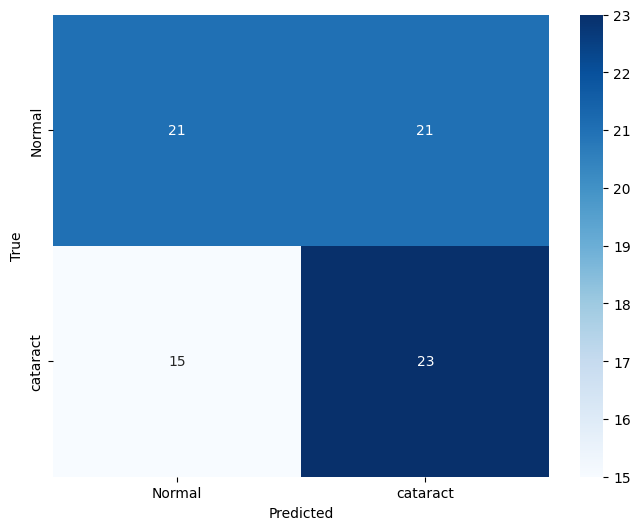

Precision: 0.5227272727272727
Recall: 0.6052631578947368
F1 Score: 0.5609756097560975


In [19]:
# Predictions on the test data
test_generator.reset()
preds = model.predict(test_generator)
y_pred = np.where(preds > 0.5, 1, 0).flatten()

# Classification report and confusion matrix
y_true = test_generator.classes

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Calculate precision, recall, and F1 score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Saving 2_JPG.rf.8b22a8cb6522a1ad0068094fd6f3e355.jpg to 2_JPG.rf.8b22a8cb6522a1ad0068094fd6f3e355.jpg
1/1 [==============================] - 0s 312ms/step


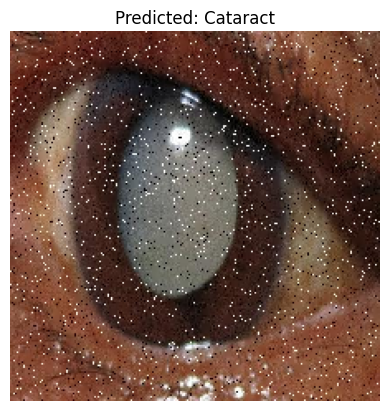

In [20]:
from tensorflow.keras.preprocessing import image
from google.colab import files
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def upload_and_predict(model, img_size):
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Load the image
        img = load_img(fn, target_size=img_size)

        # Preprocess the image
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict the class
        prediction = model.predict(img_array)
        predicted_class = 'Cataract' if prediction[0] > 0.5 else 'Normal'

        # Display the image and prediction
        plt.imshow(img)
        plt.title(f'Predicted: {predicted_class}')
        plt.axis('off')
        plt.show()

# Define the image size your model expects
IMG_SIZE = (224, 224)  # Example size, change to your model's input size

# Call the function to upload and predict
upload_and_predict(model, IMG_SIZE)


In [21]:
from tensorflow.keras.models import load_model
model.save('cataract_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0
